In [84]:

# video_file = 'video/pingpong.mp4'
# output_dir = 'video/frames/'


# !ffmpeg -i video/pingpong.mp4 -vf fps=25 video/frames/frame_%d.jpg

In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
# from skimage.feature import match_template, peak_local_max
from matplotlib.patches import Rectangle


In [86]:
import numpy as np
from scipy.ndimage import convolve, maximum_filter

def match_template(image, template):
    template = np.flipud(template)
    result = convolve(image, template, mode='constant', cval=0.0)
    return result

def peak_local_max(image, min_distance=1, threshold_abs=0.5):
    neighborhood_size = 2 * min_distance + 1
    data_max = maximum_filter(image, footprint=np.ones((neighborhood_size,)*image.ndim), mode='constant')
    peaks = np.logical_and(image == data_max, image > threshold_abs * np.max(image))
    return np.argwhere(peaks)


### scene 1

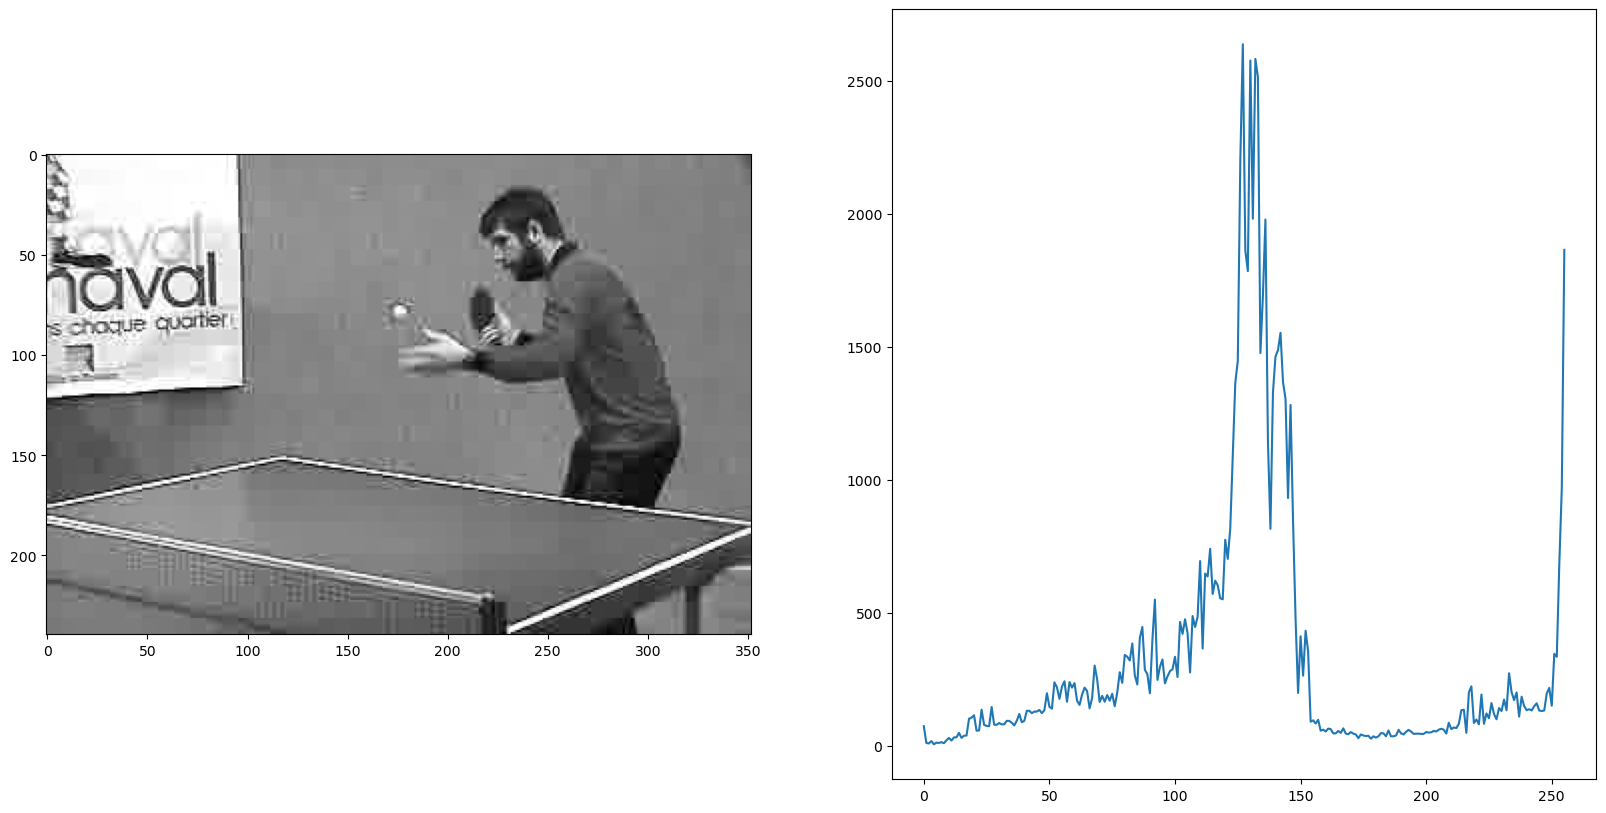

In [87]:
img=cv2.imread('video/frames/frame_60.jpg',cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img,cmap='gray')
ax[1].plot(hist)
# plt.xlim([0, 256])
plt.show()

Text(0.5, 1.0, 'modified')

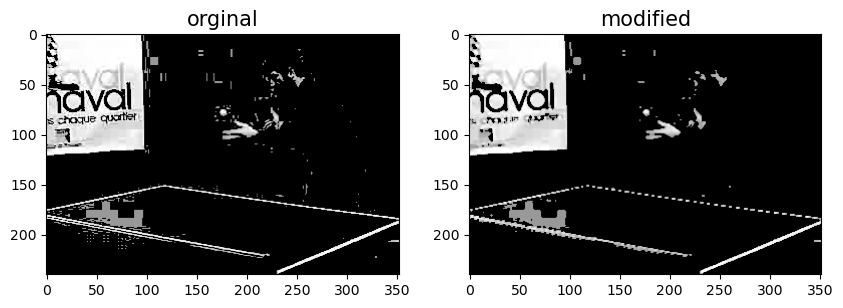

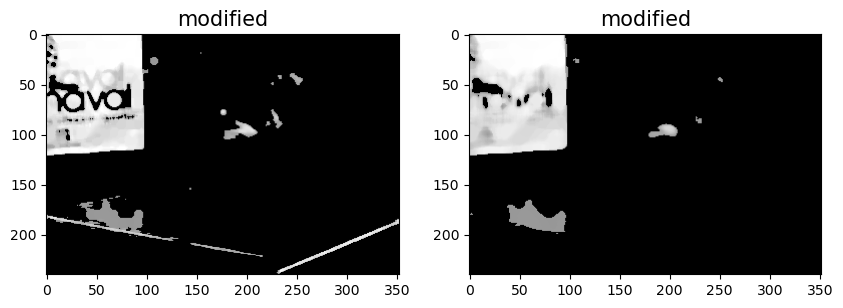

In [88]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img*(img>150),cmap='gray')
# ax[0].add_patch(Rectangle((130, 50), 30, 30, edgecolor='r', facecolor='none'));
ax[0].set_title('orginal',fontsize=15)
#Showing Patch
# patch = img[50:80, 130:160]
ax[1].imshow(cv2.medianBlur(img*(img>150),3),cmap='gray')
ax[1].set_title('modified',fontsize=15)

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(cv2.medianBlur(img*(img>150),5),cmap='gray')
# ax[0].add_patch(Rectangle((130, 50), 30, 30, edgecolor='r', facecolor='none'));
ax[0].set_title('modified',fontsize=15)
#Showing Patch
# patch = img[50:80, 130:160]
ax[1].imshow(cv2.medianBlur(img*(img>150),11),cmap='gray')
ax[1].set_title('modified',fontsize=15)



Text(0.5, 1.0, 'modified')

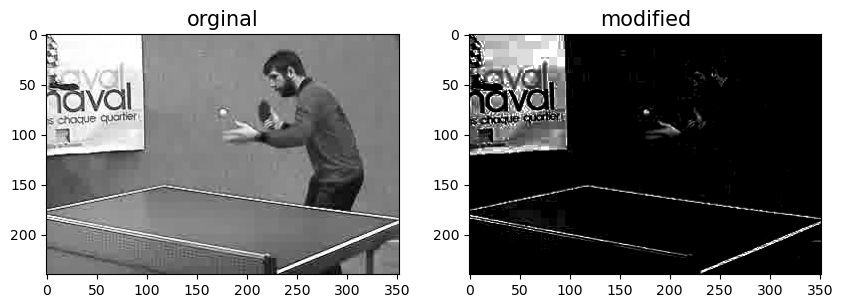

In [89]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img,cmap='gray')
# ax[0].add_patch(Rectangle((130, 50), 30, 30, edgecolor='r', facecolor='none'));
ax[0].set_title('orginal',fontsize=15)
#Showing Patch
# patch = img[50:80, 130:160]
ax[1].imshow(cv2.cvtColor(cv2.equalizeHist(img*(img>150)), cv2.COLOR_GRAY2BGR),cmap='gray')
ax[1].set_title('modified',fontsize=15)



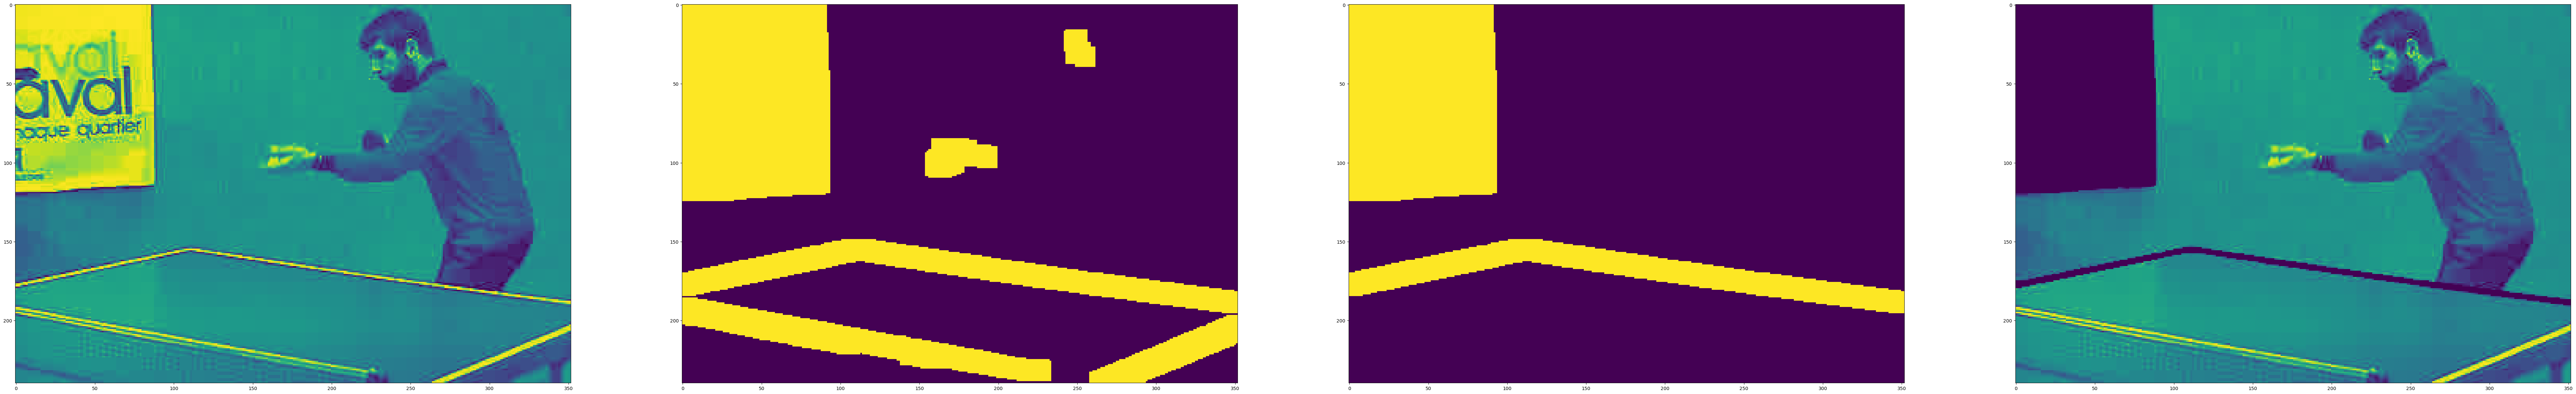

In [90]:
img=cv2.imread('video/frames/frame_55.jpg')
kernel = np.ones((3, 3), np.uint8)

def filter_stationary_objects(image, min_area):
    # Find connected components in the image
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image, connectivity=8)

    # Filter small objects based on their area
    filtered_labels = np.zeros_like(labels)
    for label in range(1, num_labels):
        area = stats[label, cv2.CC_STAT_AREA]
        if (area >= min_area):
            filtered_labels[labels == label] = 255

    return num_labels,filtered_labels.astype(np.uint8)




# Apply color segmentation
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
sensitivty=50
lower_color = np.array([0,0,255-sensitivty])
upper_color = np.array([255,sensitivty,255])
mask = cv2.inRange(hsv_img, lower_color, upper_color)


# Apply preprocessing operations if necessary
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = cv2.dilate(mask, kernel, iterations=6)

num_labels,filtered_mask = filter_stationary_objects(mask,5000)

filtered_stationary_objects = cv2.erode(filtered_mask, kernel, iterations=5)

img_processed = img_gray * (filtered_stationary_objects ==0)   

fig, ax = plt.subplots(1,4,figsize=(100,100))
ax[0].imshow(img_gray)
ax[1].imshow(mask)
ax[2].imshow(filtered_mask)
ax[3].imshow(img_processed)

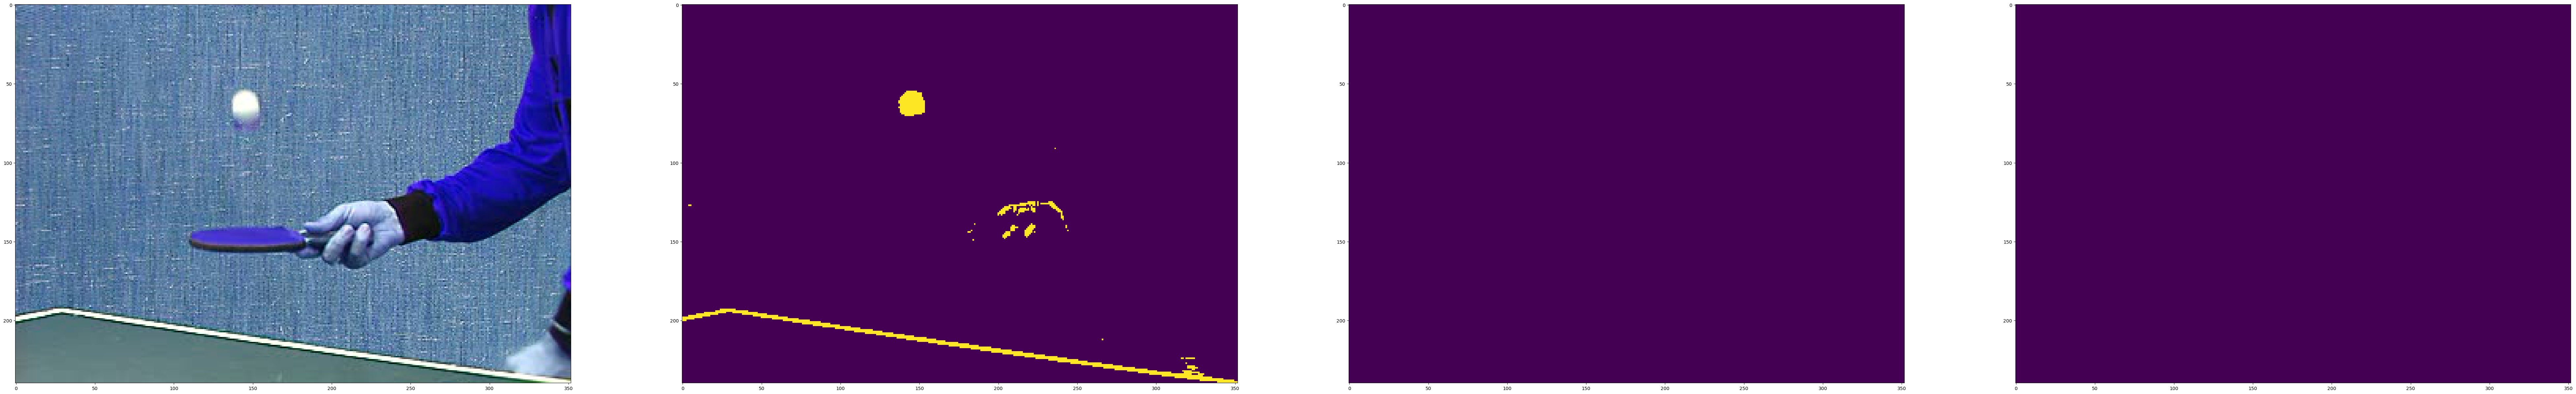

In [91]:
def filter_small_objects(image, min_area ,min_area2):
    # Find connected components in the image
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image, connectivity=8)

    # Filter small objects based on their area
    filtered_labels = np.zeros_like(labels)
    for label in range(1, num_labels):
        area = stats[label, cv2.CC_STAT_AREA]
        if (area <= min_area) & (area >= min_area2 ):
            filtered_labels[labels == label] = 255

    return num_labels,filtered_labels.astype(np.uint8)


img=cv2.imread('video/frames/frame_1.jpg')


# Apply color segmentation
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
sensitivty=50
lower_color = np.array([0,0,255-sensitivty])
upper_color = np.array([255,sensitivty,255])
mask = cv2.inRange(hsv_img, lower_color, upper_color)
mask = mask * (filtered_stationary_objects ==0)   
# Apply preprocessing operations if necessary
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

num_labels,filtered_mask = filter_small_objects(mask,500,10)
filtered_mask = cv2.dilate(filtered_mask, kernel, iterations=5)
num_labels,filtered_mask = filter_small_objects(filtered_mask,500,10)

filtered_mask = cv2.erode(filtered_mask, kernel, iterations=3)
img_processed=img_gray * (filtered_mask > 0)
fig, ax = plt.subplots(1,4,figsize=(100,100))

ax[0].imshow(img)
ax[1].imshow(mask)
ax[2].imshow(filtered_mask)
ax[3].imshow(img_processed)



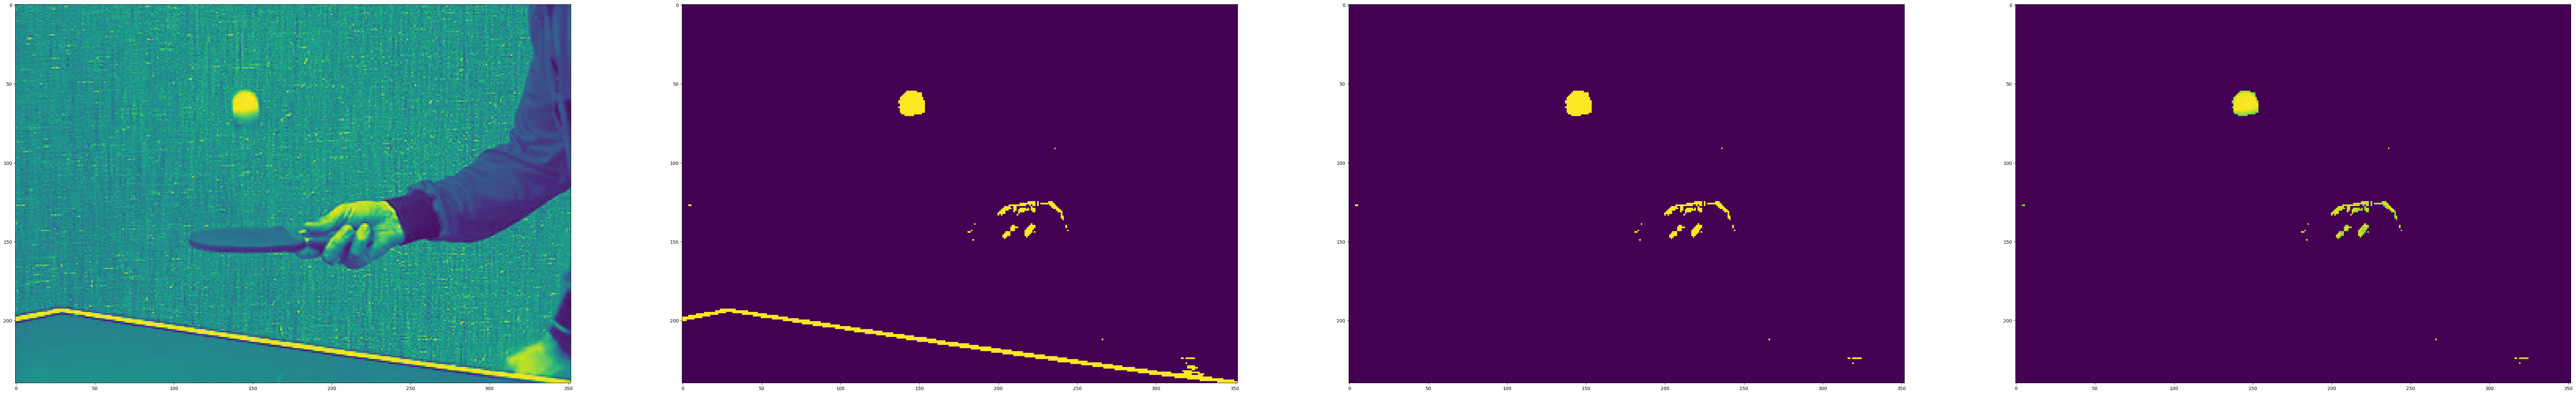

In [92]:
img=cv2.imread('video/frames/frame_1.jpg')

def filter_small_objects(image, min_area ,min_area2):
    # Find connected components in the image
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image, connectivity=8)

    # Filter small objects based on their area
    filtered_labels = np.zeros_like(labels)
    for label in range(1, num_labels):
        area = stats[label, cv2.CC_STAT_AREA]
        if (area <= min_area) & (area >= min_area2 ):
            filtered_labels[labels == label] = 255

    return num_labels,filtered_labels.astype(np.uint8)


# Apply color segmentation
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
sensitivty=50
lower_color = np.array([0,0,255-sensitivty])
upper_color = np.array([255,sensitivty,255])
mask = cv2.inRange(hsv_img, lower_color, upper_color)


# Apply preprocessing operations if necessary
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         img_processed = cv2.medianBlur(img_gray * (mask > 0), 5)


num_labels,filtered_mask = filter_small_objects(mask, 300,0)

img_processed = img_gray * (filtered_mask >0)   

fig, ax = plt.subplots(1,4,figsize=(100,100))
ax[0].imshow(img_gray)
ax[1].imshow(mask)
ax[2].imshow(filtered_mask)
ax[3].imshow(img_processed)

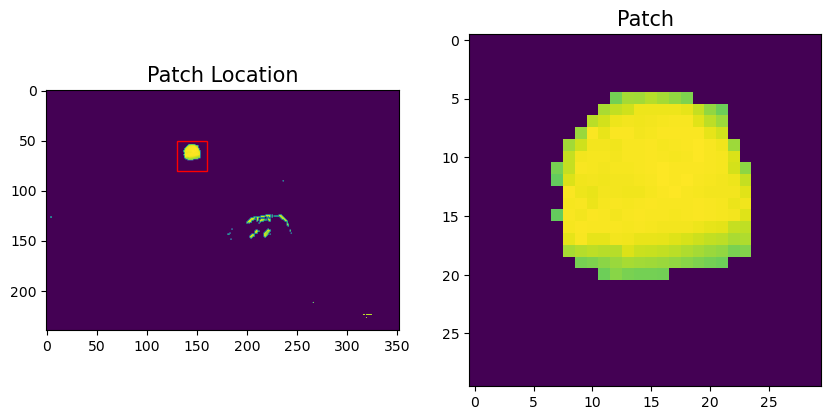

In [93]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img_processed)
ax[0].add_patch(Rectangle((130, 50), 30, 30, edgecolor='r', facecolor='none'));
ax[0].set_title('Patch Location',fontsize=15)
#Showing Patch
patch = img_processed[50:80, 130:160]
ax[1].imshow(patch)
ax[1].set_title('Patch',fontsize=15)
plt.show()

In [94]:
def filter_small_objects(image, min_area ,min_area2):
    # Find connected components in the image
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image, connectivity=8)

    # Filter small objects based on their area
    filtered_labels = np.zeros_like(labels)
    for label in range(1, num_labels):
        area = stats[label, cv2.CC_STAT_AREA]
        if (area <= min_area) & (area >= min_area2 ):
            filtered_labels[labels == label] = 255

    return num_labels,filtered_labels.astype(np.uint8)


def filter_round_contours(contours, threshold):
    filtered_contours = []
  
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        area = cv2.contourArea(contour)
      
        if perimeter > 0:
            circularity = 4 * np.pi * (area / (perimeter ** 2))
          
            if circularity >= threshold:
                filtered_contours.append(contour)

    return filtered_contours



# Define the input and output folder paths
in_folder_path = "video/frames"
out_folder_path = "video/ts"
patch_width, patch_height = patch.shape

min_area = 300
min_area2=10
last_roi = None
i=0
x_min= None
sensitivty=50
kernel = np.ones((3, 3), np.uint8)

def last_4chars(x):
    return(int(x[6:-4]))

for file_name in sorted(os.listdir(in_folder_path), key = last_4chars)[:74]:

    i+=1
    if file_name.endswith(f"{i}.jpg"):
        # Construct the full file path
        file_path = os.path.join(in_folder_path, file_name)

        # Read the image using OpenCV
        img = cv2.imread(file_path)
        
        # Apply color segmentation
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        
        lower_color = np.array([0,0,255-sensitivty])
        upper_color = np.array([255,sensitivty,255])
        mask = cv2.inRange(hsv_img, lower_color, upper_color)


        # Apply preprocessing operations if necessary
        img_processed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        mask = cv2.dilate(mask, kernel, iterations=6)

        num_labels,filtered_mask = filter_stationary_objects(mask,5000)

        filtered_stationary_objects = cv2.erode(filtered_mask, kernel, iterations=4)

        img_processed = img_processed * (filtered_stationary_objects ==0)   


        mask = cv2.inRange(hsv_img, lower_color, upper_color)
        num_labels,filtered_mask = filter_small_objects(mask, min_area,min_area2)
        img_processed = img_processed * (filtered_mask >0)
        
        if min_area>200:
            img_processed = cv2.erode(img_processed, kernel, iterations=1)
            
        img_processed = cv2.dilate(img_processed, kernel, iterations=1)
        
        
        if last_roi is not None:
            x_min = max(0, last_roi[0] - 2*patch_height)
            x_max = min(img.shape[0], last_roi[0] + 3*patch_height)
            y_min = max(0, last_roi[1] - 2*patch_width)
            y_max = min(img.shape[1], last_roi[1] + 2*patch_width)
            search_area = img_processed[x_min:x_max, y_min:y_max]
            
            detected = match_template(search_area, patch)
            
            

            # Find the coordinates of the detected region in the search area
            for x, y in peak_local_max(detected, threshold_abs=0.7):
                roi_x = x_min + x
                roi_y = y_min + y
                last_roi = (roi_x, roi_y, patch_height, patch_width)
                break  # Only consider the first detected region

            if not (peak_local_max(detected, threshold_abs=0.7)).any():
                    last_roi = None
                    if num_labels >0:
                        min_area = 50
                        min_area2=10
                    
                
        else:
            # Perform template matching on the entire image if last ROI is not available
            detected = match_template(img_processed, patch)

            # Find the coordinates of the detected region in the entire image
            for x, y in peak_local_max(detected, threshold_abs=0.5):
                last_roi = (x, y, patch_height, patch_width)
                break  # Only consider the first detected region
                
                
        # Find contours in the binary image of the OOI
        contours, _ = cv2.findContours(filtered_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Draw contours on the original image
        img_contour = img.copy()
        cv2.drawContours(img_contour, contours, -1, (0, 255, 0), 2)
        
        # Save the processed image with the detected region marked
        fig, ax = plt.subplots(1, 1, figsize=(20, 20))
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

            
        if last_roi is not None:
            rect = plt.Rectangle((last_roi[1]-7, last_roi[0]-7), patch_width, patch_height,
                             color='g', lw=10, fc='none')
            ax.add_patch(rect)

            
        output_path = os.path.join(out_folder_path, file_name)
        plt.savefig(output_path)
        plt.close()


### scene2

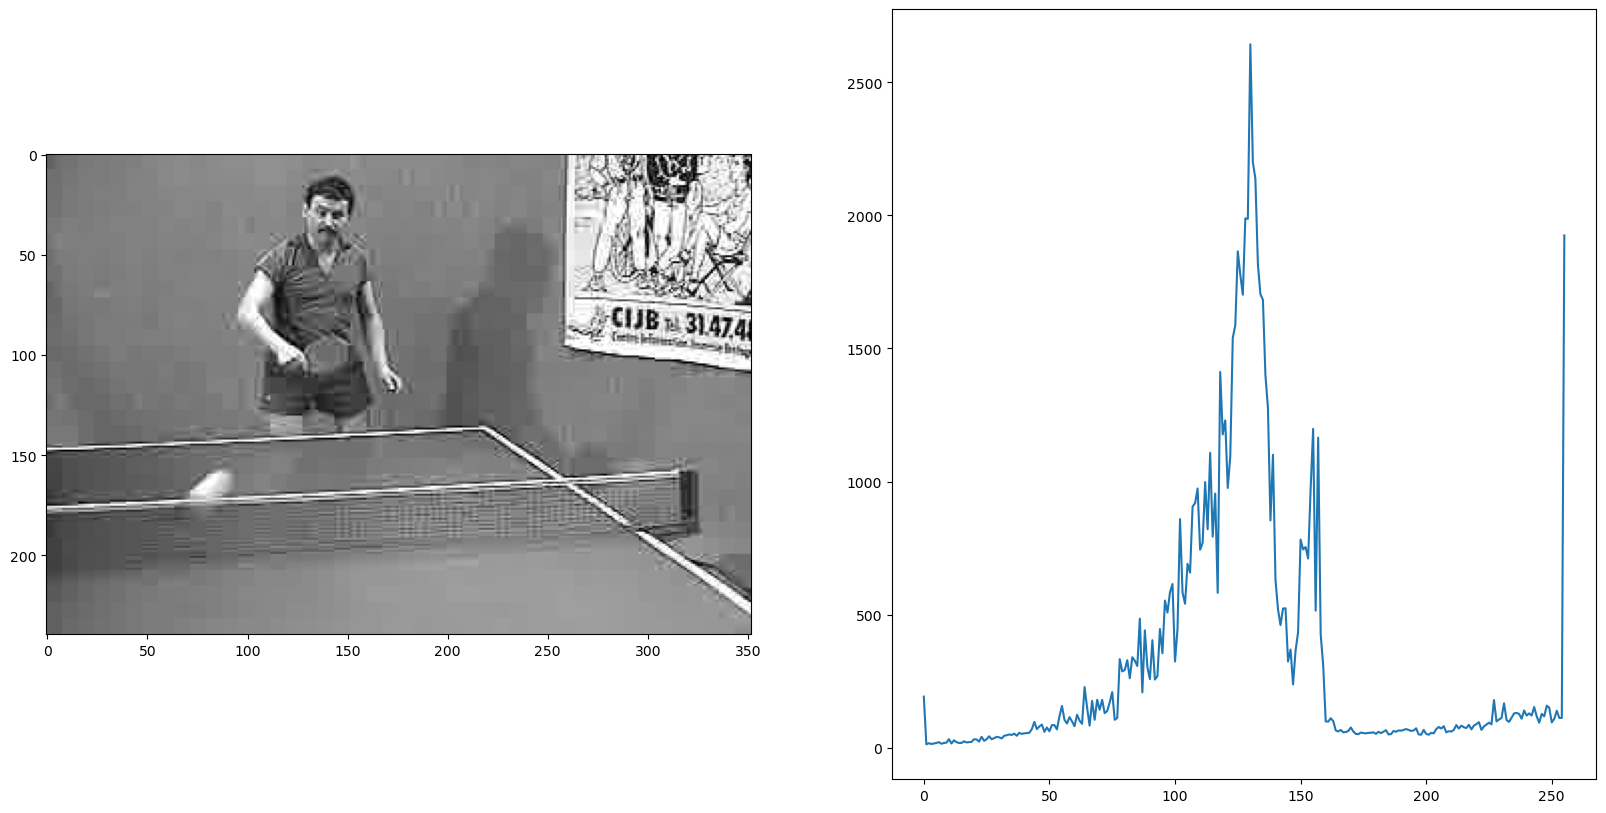

In [95]:
img=cv2.imread('video/frames/frame_101.jpg',cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(img,cmap='gray')
ax[1].plot(hist)
plt.show()

Text(0.5, 1.0, 'modified')

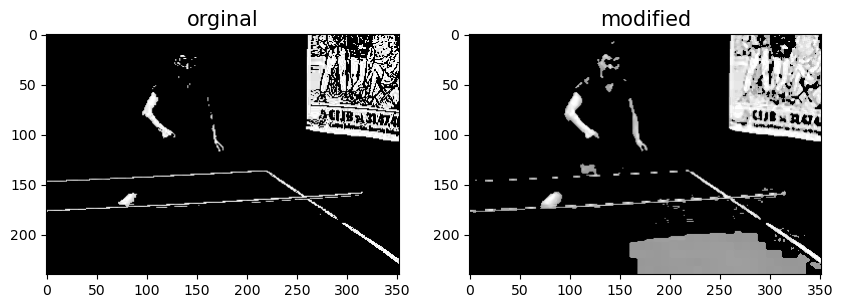

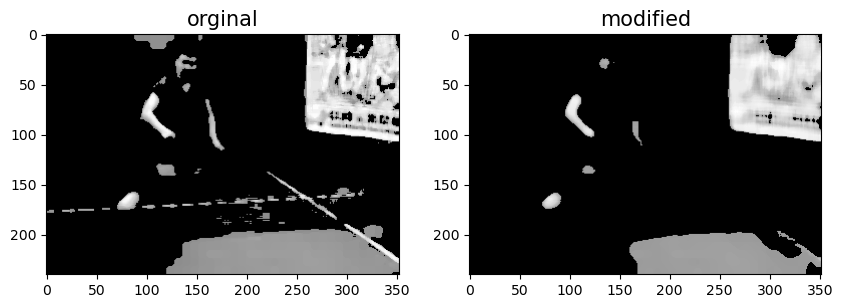

In [96]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img*(img>200),cmap='gray')
# ax[0].add_patch(Rectangle((130, 50), 30, 30, edgecolor='r', facecolor='none'));
ax[0].set_title('orginal',fontsize=15)
#Showing Patch
# patch = img[50:80, 130:160]
ax[1].imshow(cv2.medianBlur(img*(img>150),3),cmap='gray')
ax[1].set_title('modified',fontsize=15)

fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(cv2.medianBlur(img*(img>140),5),cmap='gray')
# ax[0].add_patch(Rectangle((130, 50), 30, 30, edgecolor='r', facecolor='none'));
ax[0].set_title('orginal',fontsize=15)
ax[1].imshow(cv2.medianBlur(img*(img>150),11),cmap='gray')
ax[1].set_title('modified',fontsize=15)


# ax[2].imshow(cv2.medianBlur(img,5),cmap='gray')
# ax[2].set_title('modified',fontsize=15)
# plt.show()

Text(0.5, 1.0, 'modified')

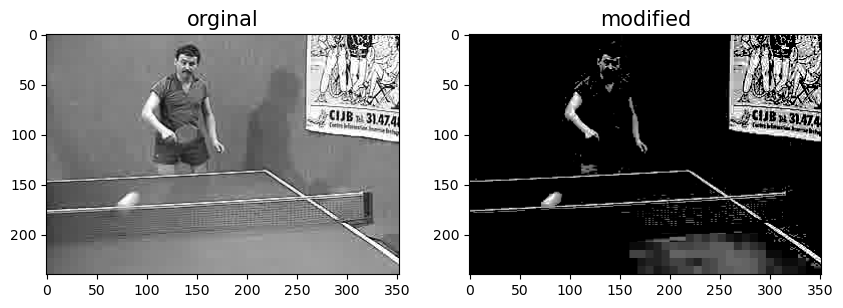

In [97]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img,cmap='gray')
# ax[0].add_patch(Rectangle((130, 50), 30, 30, edgecolor='r', facecolor='none'));
ax[0].set_title('orginal',fontsize=15)
#Showing Patch
# patch = img[50:80, 130:160]
ax[1].imshow(cv2.cvtColor(cv2.equalizeHist(img*(img>150)), cv2.COLOR_GRAY2BGR),cmap='gray')
ax[1].set_title('modified',fontsize=15)



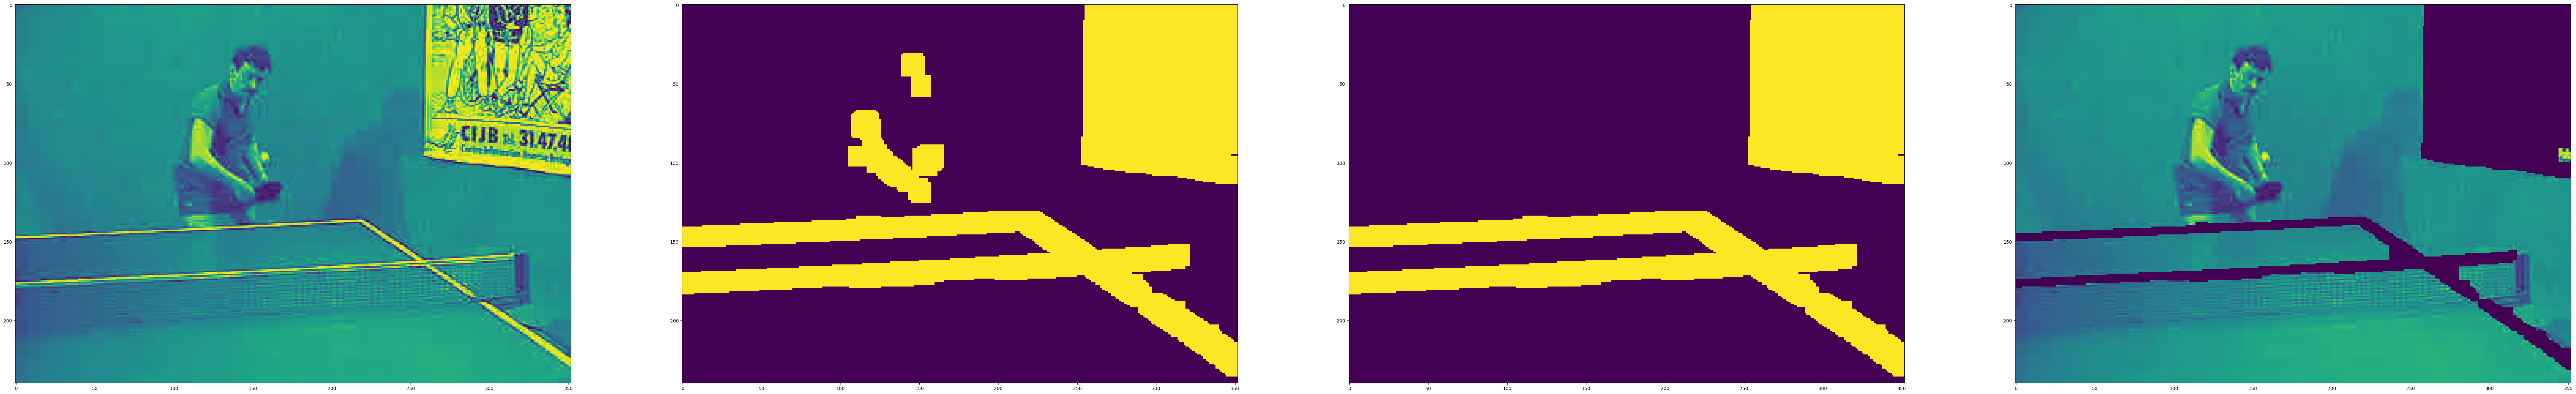

In [98]:
img=cv2.imread('video/frames/frame_76.jpg')
kernel = np.ones((3, 3), np.uint8)

def filter_stationary_objects(image, min_area):
    # Find connected components in the image
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image, connectivity=8)

    # Filter small objects based on their area
    filtered_labels = np.zeros_like(labels)
    for label in range(1, num_labels):
        area = stats[label, cv2.CC_STAT_AREA]
        if (area >= min_area):
            filtered_labels[labels == label] = 255

    return num_labels,filtered_labels.astype(np.uint8)




# Apply color segmentation
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
sensitivty=50
lower_color = np.array([0,0,255-sensitivty])
upper_color = np.array([255,sensitivty,255])
mask = cv2.inRange(hsv_img, lower_color, upper_color)


# Apply preprocessing operations if necessary
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = cv2.dilate(mask, kernel, iterations=6)

num_labels,filtered_mask = filter_stationary_objects(mask,5000)

filtered_stationary_objects = cv2.erode(filtered_mask, kernel, iterations=4)

img_processed = img_gray * (filtered_stationary_objects ==0)   

fig, ax = plt.subplots(1,4,figsize=(100,100))
ax[0].imshow(img_gray)
ax[1].imshow(mask)
ax[2].imshow(filtered_mask)
ax[3].imshow(img_processed)

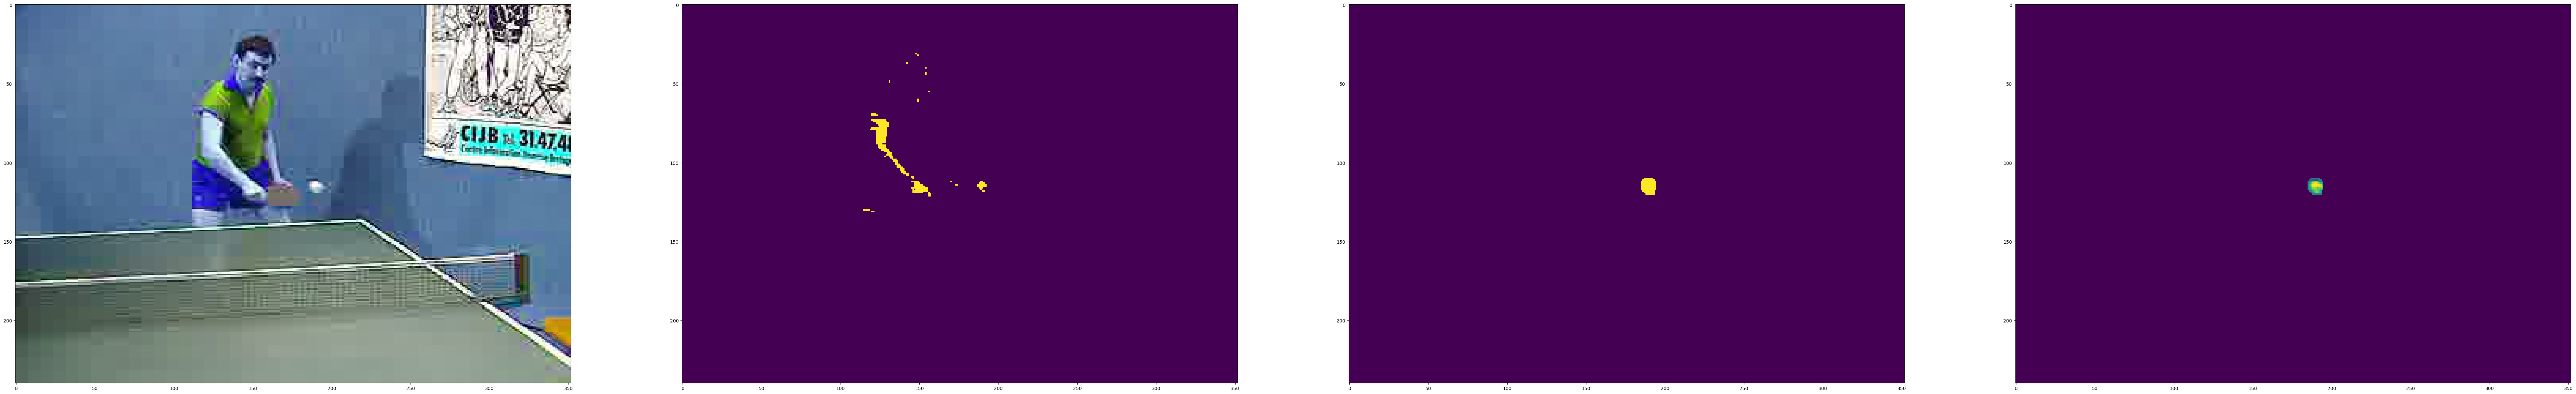

In [99]:
def filter_small_objects(image, min_area ,min_area2):
    # Find connected components in the image
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image, connectivity=8)

    # Filter small objects based on their area
    filtered_labels = np.zeros_like(labels)
    for label in range(1, num_labels):
        area = stats[label, cv2.CC_STAT_AREA]
        if (area <= min_area) & (area >= min_area2 ):
            filtered_labels[labels == label] = 255

    return num_labels,filtered_labels.astype(np.uint8)


img=cv2.imread('video/frames/frame_108.jpg')


# Apply color segmentation
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
sensitivty=50
lower_color = np.array([0,0,255-sensitivty])
upper_color = np.array([255,sensitivty,255])
mask = cv2.inRange(hsv_img, lower_color, upper_color)
mask = mask * (filtered_stationary_objects ==0)   
# Apply preprocessing operations if necessary
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

num_labels,filtered_mask = filter_small_objects(mask,500,10)
filtered_mask = cv2.dilate(filtered_mask, kernel, iterations=5)
num_labels,filtered_mask = filter_small_objects(filtered_mask,500,10)

filtered_mask = cv2.erode(filtered_mask, kernel, iterations=3)
img_processed=img_gray * (filtered_mask > 0)
fig, ax = plt.subplots(1,4,figsize=(100,100))

ax[0].imshow(img)
ax[1].imshow(mask)
ax[2].imshow(filtered_mask)
ax[3].imshow(img_processed)



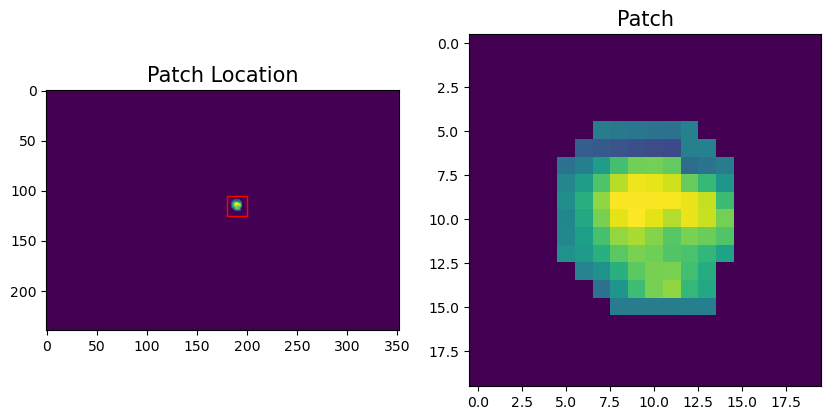

In [100]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img_processed)
ax[0].add_patch(Rectangle((180, 105), 20, 20, edgecolor='r', facecolor='none'));
ax[0].set_title('Patch Location',fontsize=15)
#Showing Patch
patch = img_processed[105:125, 180:200]
ax[1].imshow(patch)
ax[1].set_title('Patch',fontsize=15)
plt.show()

In [101]:



def filter_small_objects(image, min_area ,min_area2):
    # Find connected components in the image
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(image, connectivity=8)

    # Filter small objects based on their area
    filtered_labels = np.zeros_like(labels)
    for label in range(1, num_labels):
        area = stats[label, cv2.CC_STAT_AREA]
        if (area <= min_area) & (area >= min_area2 ):
            filtered_labels[labels == label] = 255

    return num_labels,filtered_labels.astype(np.uint8)


def filter_round_contours(contours, threshold):
    filtered_contours = []
  
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        area = cv2.contourArea(contour)
      
        if perimeter > 0:
            circularity = 4 * np.pi * (area / (perimeter ** 2))
          
            if circularity >= threshold:
                filtered_contours.append(contour)

    return filtered_contours


in_folder_path = "video/frames"
out_folder_path = "video/ts"

patch_width, patch_height = patch.shape

last_roi = None
i=74
x_min= None
sensitivty=50


def last_4chars(x):
    
    return(int(x[6:-4]))

for file_name in sorted(os.listdir(in_folder_path), key = last_4chars)[74:]:
    
    i+=1
    
    if i not in (np.arange(89,99)).tolist():
        if file_name.endswith(f"{i}.jpg"):
            file_path = os.path.join(in_folder_path, file_name)
            img = cv2.imread(file_path)
            hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            lower_color = np.array([0,0,255-sensitivty])
            upper_color = np.array([255,sensitivty,255])
            mask = cv2.inRange(hsv_img, lower_color, upper_color)

            

            mask = mask * (filtered_stationary_objects ==0)   
            num_labels,filtered_mask = filter_small_objects(mask,300,10)
            filtered_mask = cv2.dilate(filtered_mask, kernel, iterations=5)
            num_labels,filtered_mask = filter_small_objects(filtered_mask,500,10)
            filtered_mask = cv2.erode(filtered_mask, kernel, iterations=5)

            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_processed = img_gray * (filtered_mask > 0)
            img_processed[:70,:]=0


            if last_roi is not None:
                x_min = max(0, last_roi[0] - int(1.2*patch_height))
                x_max = min(img.shape[0], last_roi[0] + 3*patch_height)
                y_min = max(0, last_roi[1] - int(1.2*patch_width))
                y_max = min(img.shape[1], last_roi[1] + 3*patch_width)
                search_area = img_processed[x_min:x_max, y_min:y_max]

                detected = match_template(search_area, patch)



                # Find the coordinates of the detected region in the search area
                for x, y in peak_local_max(detected, threshold_abs=0.3):
                    roi_x = x_min + x
                    roi_y = y_min + y
                    last_roi = (roi_x, roi_y, patch_height, patch_width)
                    break  # Only consider the first detected region

                if not (peak_local_max(detected, threshold_abs=0.3)).any():
                    
                    img_processed = cv2.dilate(img_processed, kernel, iterations=4)
                    num,img_processed= filter_small_objects(img_processed,200,0)
                    img_processed = cv2.erode(img_processed, kernel, iterations=3)    
                    search_area = img_processed[x_min:x_max, y_min:y_max]

                    detected = match_template(search_area, patch)


                    # Find the coordinates of the detected region in the search area
                    for x, y in peak_local_max(detected, threshold_abs=0.1):
                        roi_x = x_min + x
                        roi_y = y_min + y
                        last_roi = (roi_x, roi_y, patch_height, patch_width)
                        break  # Only consider the first detected region
                    if not (peak_local_max(detected, threshold_abs=0.5)).any():
                        last_roi=None
                        


            else:
                detected = match_template(img_processed, patch)
                for x, y in peak_local_max(detected, threshold_abs=0.2):
                    last_roi = (x, y, patch_height, patch_width)
                    break  # Only consider the first detected region




            # Save the processed image with the detected region marked
            fig, ax = plt.subplots(1, 1, figsize=(20, 20))
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            
            if last_roi is not None:
                rect = plt.Rectangle((last_roi[1]-7, last_roi[0]-7), patch_width, patch_height,
                                 color='g', lw=10, fc='none')
                ax.add_patch(rect)

            output_path = os.path.join(out_folder_path, file_name)

            plt.savefig(output_path)
            plt.close()
            
            
    else:
            if file_name.endswith(f"{i}.jpg"):
                # Construct the full file path
                file_path = os.path.join(in_folder_path, file_name)

                # Read the image using OpenCV
                img = cv2.imread(file_path,cv2.COLOR_BGR2RGB)
                output_path = os.path.join(out_folder_path, file_name)
        
                fig, ax = plt.subplots(1, 1, figsize=(20, 20))
                ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            
                plt.savefig(output_path)
                plt.close()

In [102]:
# Path to the directory containing the frames
frames_folder = "video/ts"

# Path to the output video file
output_video = "video/video_defined_matching.mp4"

# Get the list of frame files in the frames folder
frame_files = sorted(os.listdir(in_folder_path), key = last_4chars)

# Read the first frame to get the size
first_frame = cv2.imread(os.path.join(frames_folder, frame_files[0]))
frame_height, frame_width, _ = first_frame.shape

# Create a VideoWriter object to write the frames to a video
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Specify the codec (MP4V)
fps = 30  # Specify the frames per second
video_writer = cv2.VideoWriter(output_video, fourcc, fps, (frame_width, frame_height))

# Write each frame to the video
for frame_file in frame_files:
    frame_path = os.path.join(frames_folder, frame_file)
    frame = cv2.imread(frame_path)
    video_writer.write(frame)

# Release the video writer
video_writer.release()

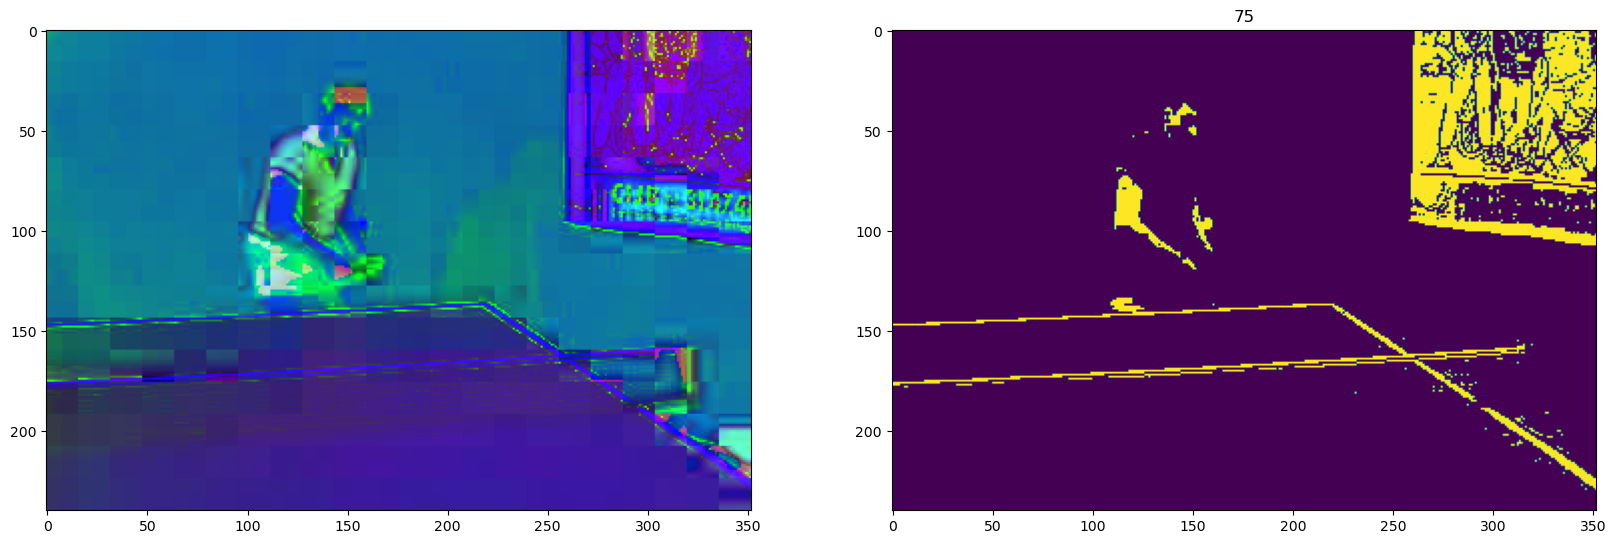

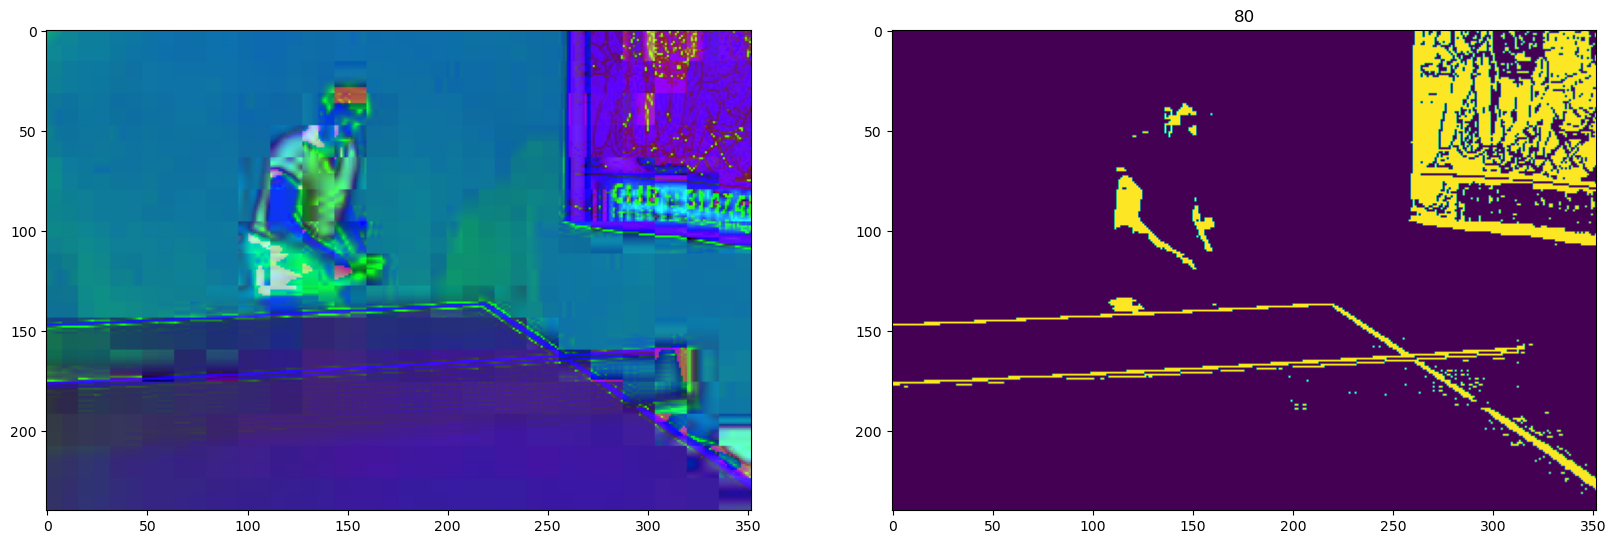

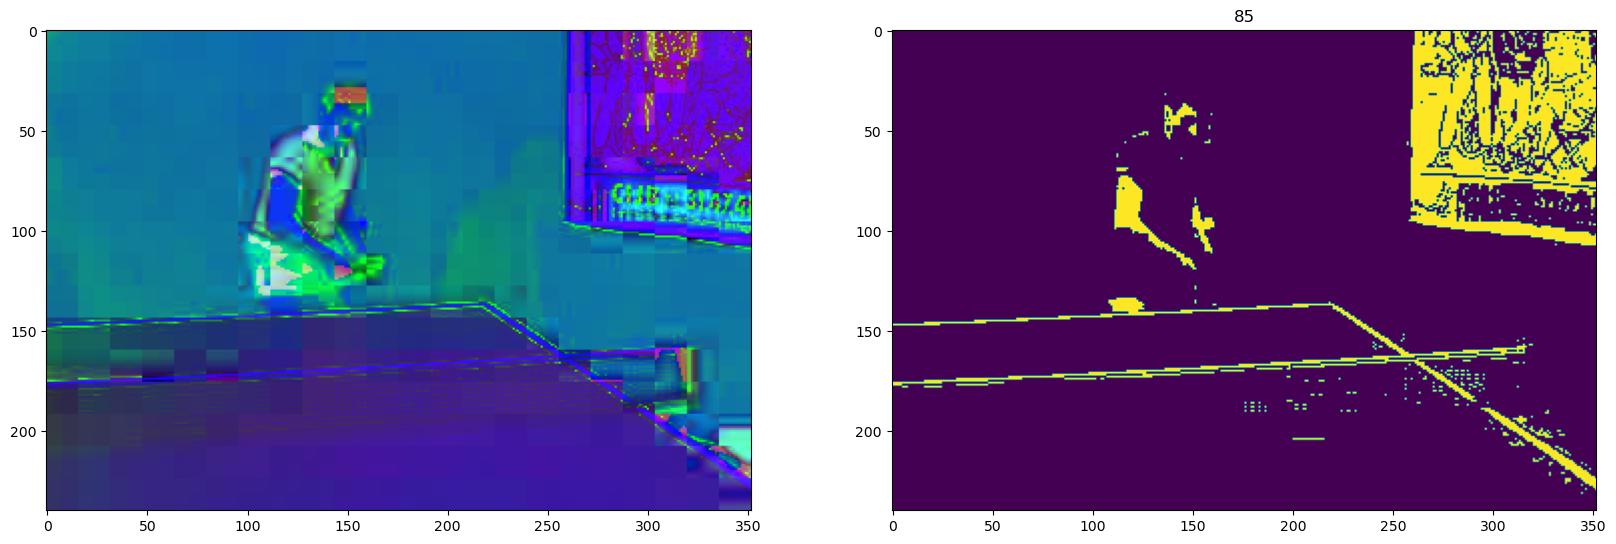

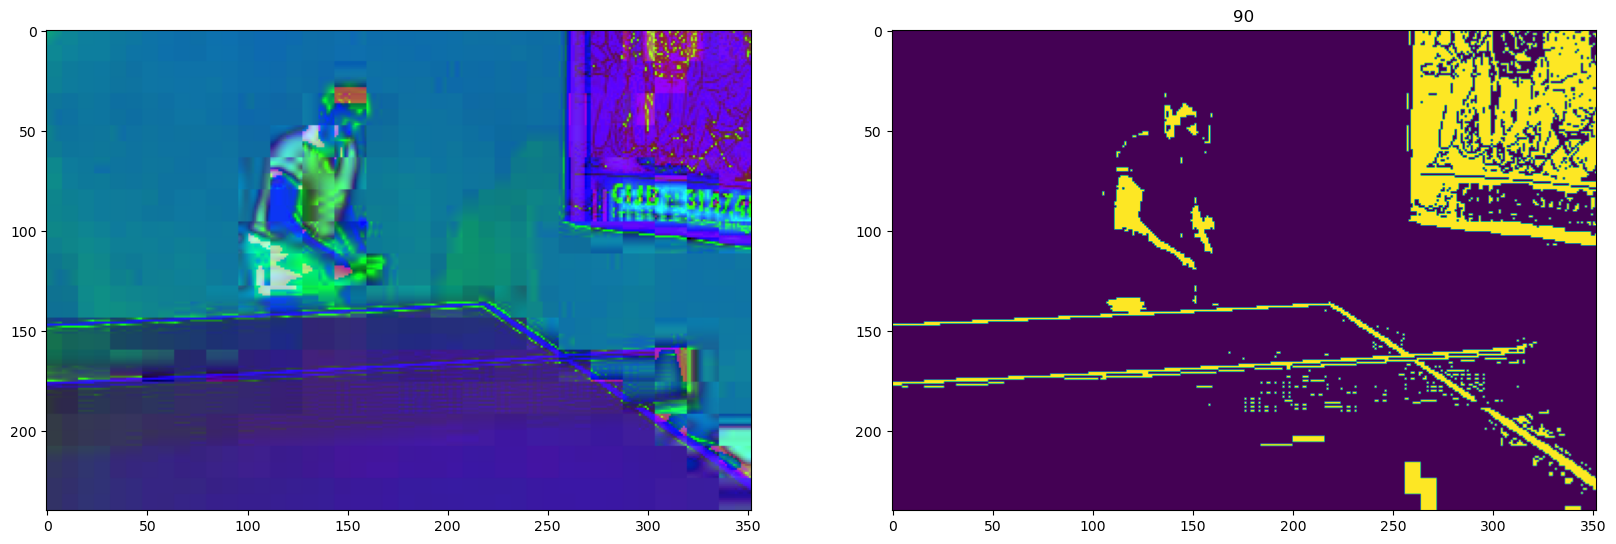

In [309]:
# img=cv2.imread('video/frames/frame_76.jpg')





# hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# for i in np.arange(75,95,5):
    
#     lower_color = np.array([0,0,255-i])
#     upper_color = np.array([255,i,255])

#     fig, ax = plt.subplots(1, 2, figsize=(20, 20))
#     ax[0].imshow(hsv_img)

#     mask = cv2.inRange(hsv_img, lower_color, upper_color)
#     ax[1].imshow(mask)
#     plt.title(i)
#     plt.show()
    